<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg" align="left" width="45%">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo de Fin de Máster</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Machine Learning para predecir cancelaciones y mejorar la retención en seguros

## Análisis exploratorio y preprocesamiento

In [28]:
import pandas as pd
df = pd.read_csv('autoinsurance_Churn.csv')

In [29]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df.head())

   individual_id    address_id  curr_ann_amt  days_tenure cust_orig_date  \
0   2.213000e+11  5.213000e+11    818.877997       1454.0     2018-12-09   
1   2.213001e+11  5.213001e+11    974.199182       1795.0     2018-01-02   
2   2.213007e+11  5.213002e+11    967.375112       4818.0     2009-09-23   
3   2.213016e+11  5.213006e+11    992.409561        130.0     2022-07-25   
4   2.213016e+11  5.213006e+11    784.633494       5896.0     2006-10-11   

   age_in_years date_of_birth   latitude  longitude           city state  \
0            44    1978-06-23  32.578829 -96.305006        Kaufman    TX   
1            72    1950-05-30  32.732209 -97.000893  Grand Prairie    TX   
2            55    1967-07-07  32.819777 -96.846938         Dallas    TX   
3            53    1969-05-25  32.684065 -97.162180      Arlington    TX   
4            50    1972-09-25  32.751398 -97.376745     Fort Worth    TX   

    county    income  has_children  length_of_residence marital_status  \
0  Kaufman  

In [30]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [31]:
df.shape

(1680909, 22)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [33]:
df.isnull().sum()

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

Vamos a interntar encontrar variables que tengan una alta correlación con home_value_market para poder interpolar los valores perdidos

/var/folders/5w/3ld8z599699cd303197k9s9r0000gn/T/ipykernel_23324/226910866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


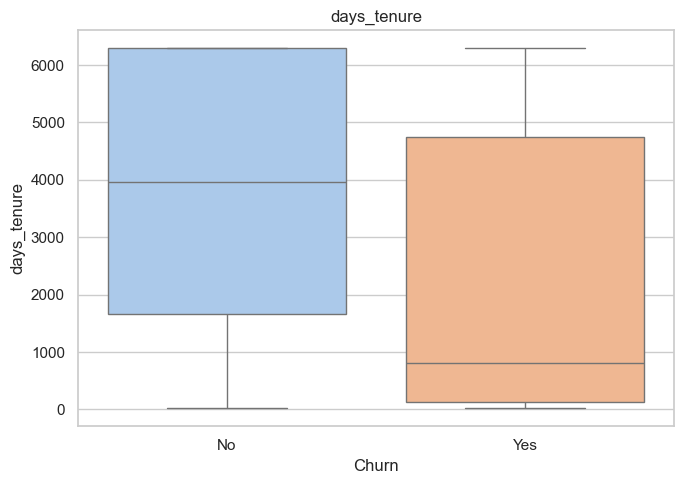

/var/folders/5w/3ld8z599699cd303197k9s9r0000gn/T/ipykernel_23324/226910866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


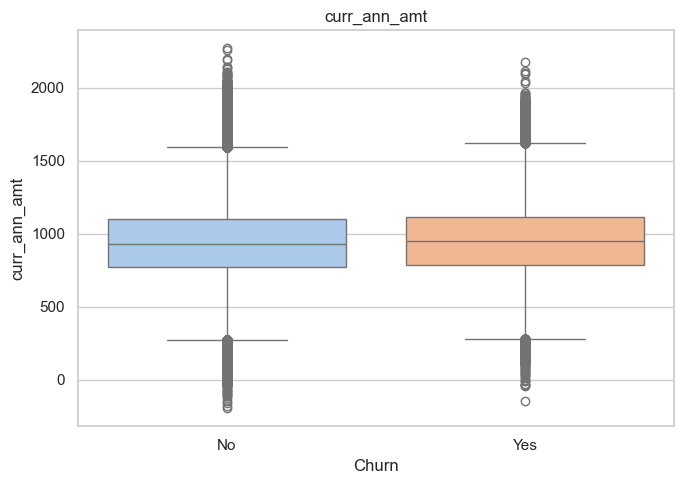

/var/folders/5w/3ld8z599699cd303197k9s9r0000gn/T/ipykernel_23324/226910866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


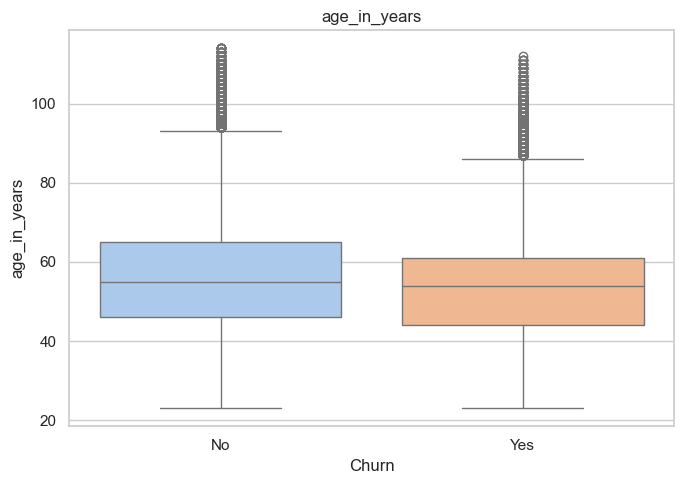

/var/folders/5w/3ld8z599699cd303197k9s9r0000gn/T/ipykernel_23324/226910866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


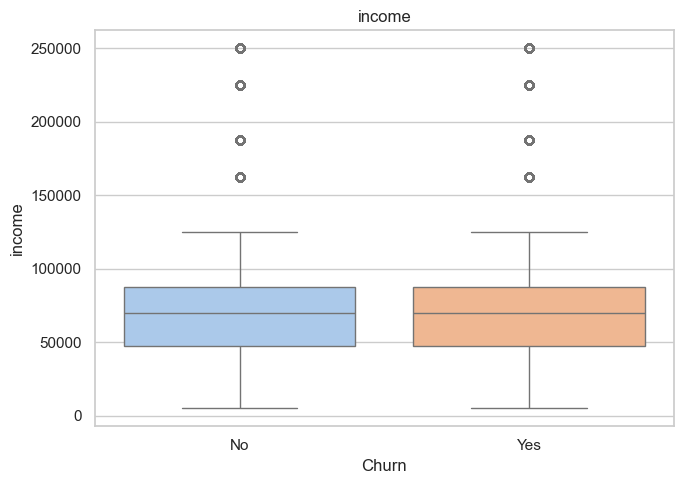

/var/folders/5w/3ld8z599699cd303197k9s9r0000gn/T/ipykernel_23324/226910866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


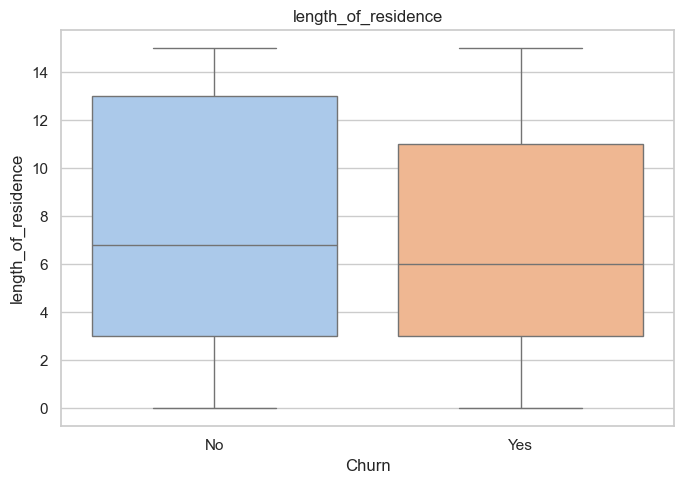

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Churn_label'] = df['Churn'].map({1: 'Yes', 0: 'No'})
variables = ['days_tenure', 'curr_ann_amt', 'age_in_years', 'income', 'length_of_residence']

sns.set(style="whitegrid")

for var in variables:
    plt.figure(figsize=(7, 5))
    sns.boxplot(
        data=df,
        x='Churn_label',
        y=var,
        palette='pastel'
    )
    plt.title(var)
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [37]:
import numpy as np
df.loc[df['curr_ann_amt'] < 0, 'curr_ann_amt'] = np.nan
df.loc[df['age_in_years'] > 93, 'age_in_years'] = np.nan

In [38]:
df["home_market_value"].unique()

array(['50000 - 74999', '75000 - 99999', '175000 - 199999',
       '225000 - 249999', '125000 - 149999', '100000 - 124999',
       '25000 - 49999', '150000 - 174999', nan, '200000 - 224999',
       '250000 - 274999', '275000 - 299999', '400000 - 449999',
       '300000 - 349999', '1000000 Plus', '1000 - 24999',
       '750000 - 999999', '350000 - 399999', '500000 - 749999',
       '450000 - 499999'], dtype=object)

In [39]:
orden_valores = [
    '1000 - 24999', '25000 - 49999', '50000 - 74999', '75000 - 99999',
    '100000 - 124999', '125000 - 149999', '150000 - 174999', '175000 - 199999',
    '200000 - 224999', '225000 - 249999', '250000 - 274999', '275000 - 299999',
    '300000 - 349999', '350000 - 399999', '400000 - 449999', '450000 - 499999',
    '500000 - 749999', '750000 - 999999', '1000000 Plus'
]

ordinal_map = {valor: i for i, valor in enumerate(orden_valores)}
df['home_value_ordinal'] = df['home_market_value'].map(ordinal_map)

In [40]:
correlacion = df[['home_value_ordinal', 'income', 'curr_ann_amt', 'days_tenure', 'age_in_years', 'has_children', 'length_of_residence',
    'home_owner', 'college_degree', 'good_credit', 'Churn']].corr(method='spearman')
print(correlacion)

                     home_value_ordinal    income  curr_ann_amt  days_tenure  \
home_value_ordinal             1.000000  0.439088      0.035942     0.003749   
income                         0.439088  1.000000      0.125384     0.017952   
curr_ann_amt                   0.035942  0.125384      1.000000     0.031506   
days_tenure                    0.003749  0.017952      0.031506     1.000000   
age_in_years                  -0.025985 -0.003806      0.092348     0.321252   
has_children                   0.023627  0.042775     -0.032867    -0.056592   
length_of_residence           -0.151933  0.027458      0.178028     0.106723   
home_owner                    -0.047904  0.185938      0.113358     0.062151   
college_degree                 0.081351  0.111795      0.085838     0.042148   
good_credit                    0.169950  0.318412      0.053952     0.014137   
Churn                         -0.000616 -0.005853      0.017954    -0.220231   

                     age_in_years  has_

La correlación más alta es con income, pero es muy baja para poder interpolar (0.40), por eso se decido eliminar los valores faltantes de esta variable

In [42]:
# Eliminar los valores nulos de variables que se incluirán en el modelo
df = df.dropna(subset=['home_market_value', 'curr_ann_amt', 'age_in_years'])

In [43]:
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn,home_value_ordinal
count,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.405314e+06,1.405314e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06,1.570898e+06
mean,2.213018e+11,5.213007e+11,9.437716e+02,3.603873e+03,5.558708e+01,3.285128e+01,-9.694734e+01,8.209022e+04,5.240047e-01,7.883397e+00,8.640924e-01,3.547372e-01,8.455202e-01,1.145612e-01,4.642140e+00
std,9.932301e+05,4.177118e+05,2.470378e+02,2.340907e+03,1.387593e+01,1.943427e-01,2.961903e-01,5.464343e+04,4.994236e-01,4.957525e+00,3.426905e-01,4.784338e-01,3.614082e-01,3.184918e-01,2.853165e+00
min,2.213000e+11,5.213000e+11,1.624720e-01,2.000000e+01,2.300000e+01,3.199061e+01,-9.802223e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,7.752716e+02,1.404000e+03,4.600000e+01,3.271235e+01,-9.716699e+01,4.750000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00
50%,2.213018e+11,5.213007e+11,9.385938e+02,3.655000e+03,5.500000e+01,3.284698e+01,-9.690325e+01,7.000000e+04,1.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
75%,2.213027e+11,5.213010e+11,1.106969e+03,6.291000e+03,6.400000e+01,3.298512e+01,-9.672031e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00
max,2.213033e+11,5.213015e+11,2.261361e+03,6.291000e+03,9.300000e+01,3.354658e+01,-9.607035e+01,2.500000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01


In [44]:
df['county'].unique()

array(['Kaufman', 'Dallas', 'Tarrant', 'Denton', 'Collin', 'Parker',
       'Ellis', 'Navarro', 'Hunt', 'Johnson', 'Rockwall', nan, 'Cooke',
       'Grayson', 'Hill'], dtype=object)

In [45]:
df['state'].unique()

array(['TX'], dtype=object)

In [46]:
summary_table = df.groupby('Churn').agg(
    {
        'days_tenure': ['mean'],
        'curr_ann_amt': ['mean'],
        'age_in_years': ['mean'],
        'income': ['mean'],
        'has_children': ['mean'],  # Proporción de clientes con hijos
        'length_of_residence': ['mean'],
        'marital_status': lambda x: (x == 'Married').mean(),  # Proporción de clientes casados
        'college_degree': ['mean'],  # Proporción de clientes con título universitario
        'good_credit': ['mean'],  # Proporción de clientes con buen crédito
    }
)
summary_table

,days_tenure,curr_ann_amt,age_in_years,income,has_children,length_of_residence,marital_status,college_degree,good_credit
,mean,mean,mean,mean,mean,mean,<lambda>,mean,mean
Churn,,,,,,,,,
0,3778.356032,942.096842,55.861841,82207.022875,0.520240,7.943987,0.628340,0.357724,0.846415
1,2255.300021,956.715673,53.463487,81187.455301,0.553105,7.415107,0.621724,0.331650,0.838607


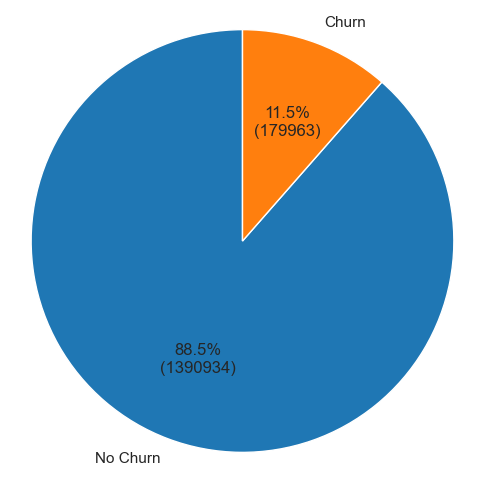

In [47]:
import matplotlib.pyplot as plt
churn_counts = df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja

plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p * churn_counts.sum() / 100)})',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.axis('equal')
plt.show()

In [48]:
df.shape

(1570898, 24)

In [49]:
# Modificar para convertir a binaria
df['marital_status'] = (df['marital_status'] == 'Married').astype(float)

# Etiqueta de clase para gráficos
df['Churn_label'] = df['Churn'].map({1: 'Yes', 0: 'No'})

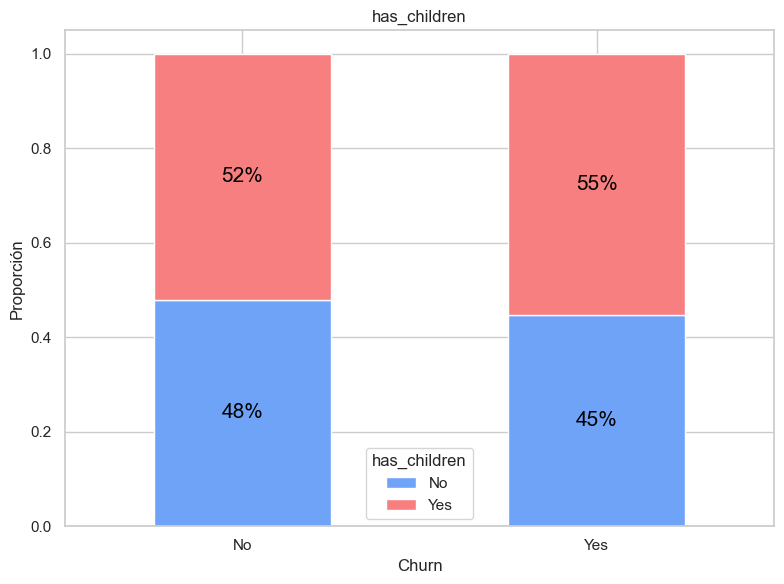

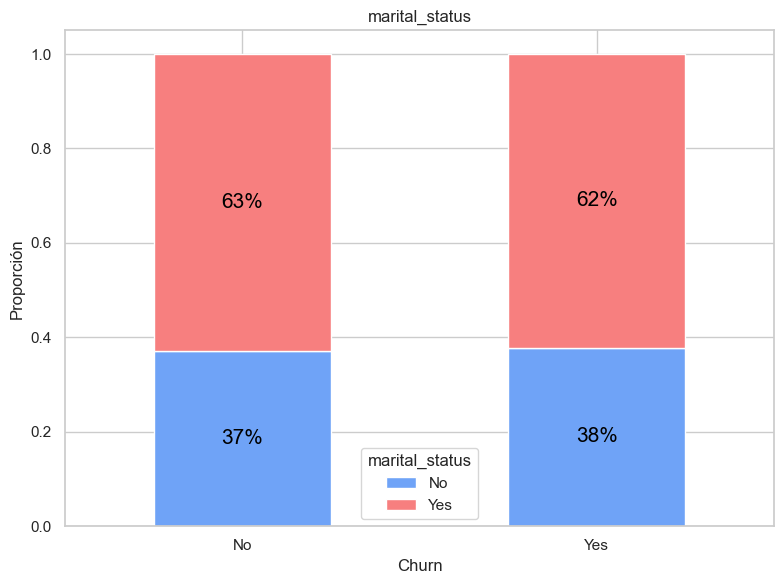

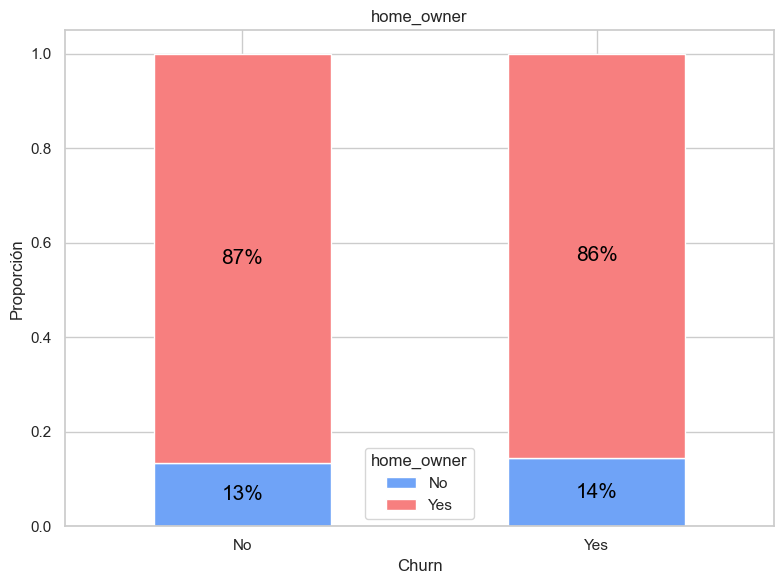

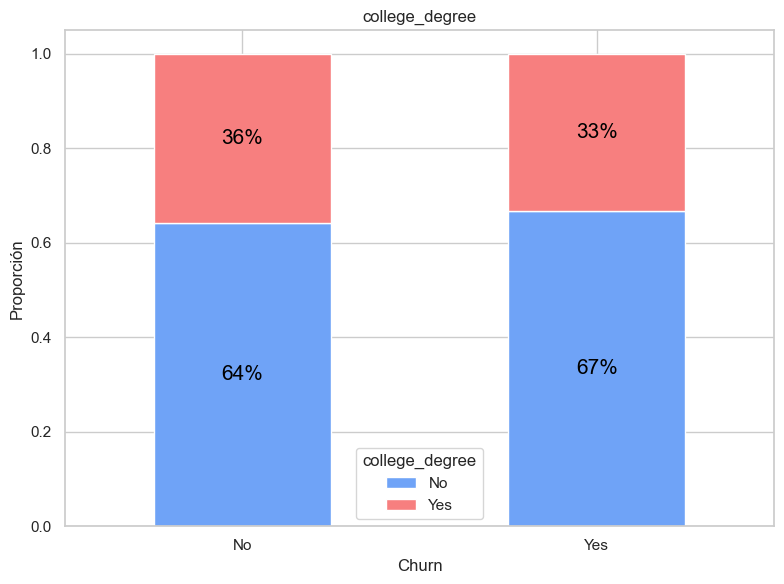

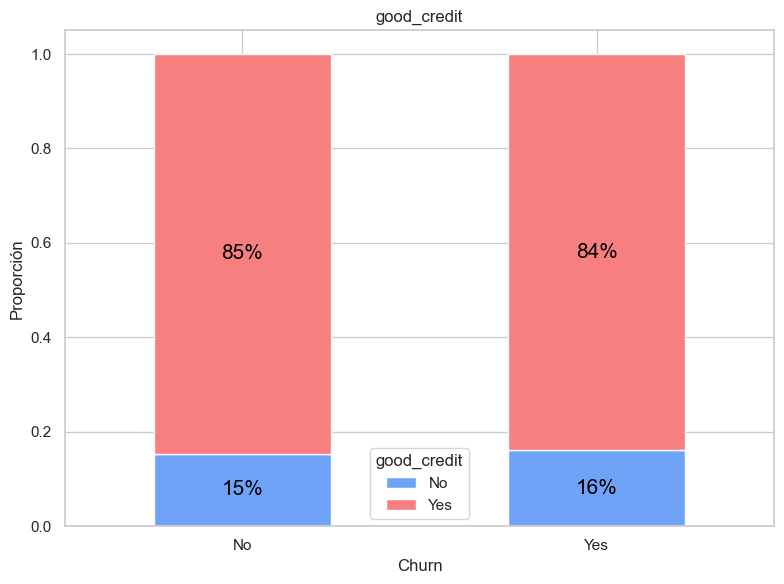

In [50]:
categorical_vars = ['has_children', 'marital_status', 'home_owner', 'college_degree', 'good_credit']
colores = ['#6fa3f7', '#f77f7f']  # azul y rojo

for var in categorical_vars:
    # Agrupar
    data = df.groupby('Churn_label')[var].value_counts(normalize=True)
    df_plot = data.unstack().loc[['No', 'Yes']]  # Asegurar orden correcto

    ax = df_plot.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores)
    for i, (index, row) in enumerate(df_plot.iterrows()):
        cum_height = 0
        for j, value in enumerate(row):
            if pd.notna(value) and value > 0:
                ax.text(i, cum_height + value / 2, f"{value:.0%}",
                        ha='center', va='center', fontsize=15, color='black')
                cum_height += value

    plt.title(var)
    plt.xlabel('Churn')
    plt.ylabel('Proporción')
    plt.xticks(rotation=0)
    ax.legend(labels=['No', 'Yes'], title=var)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()


In [ ]:
negativos = df[df['curr_ann_amt'] < 0]
print(f"Número de valores negativos en curr_ann_amt: {len(negativos)}")

Número de valores negativos en curr_ann_amt: 44


In [23]:
outliers = df[df['income'] > 200000]
print(f"Número de outliers: {len(outliers)}")

Número de outliers: 104011


In [ ]:
outliers_age = df[df['age_in_years'] > 93.5]
print(f"Número de outliers en edad: {len(outliers_age)}")

Número de outliers en edad: 17681


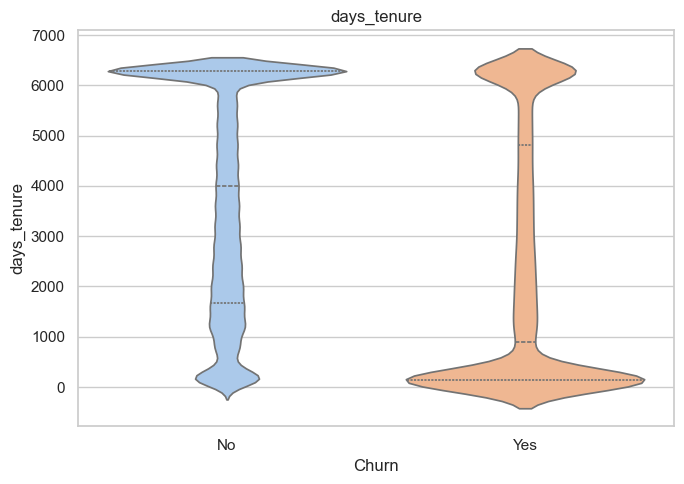

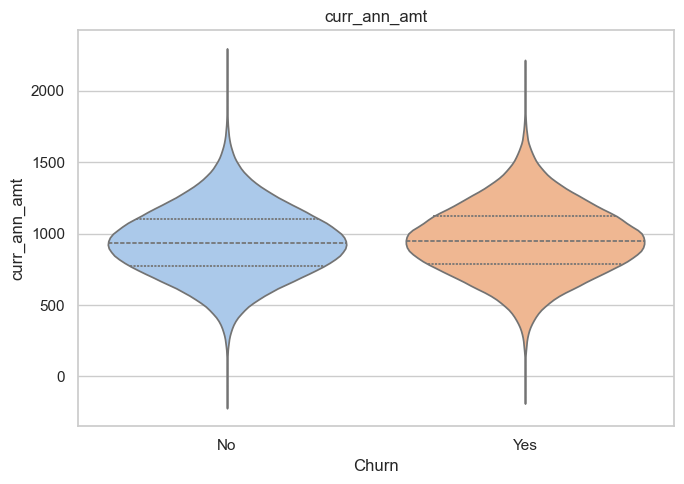

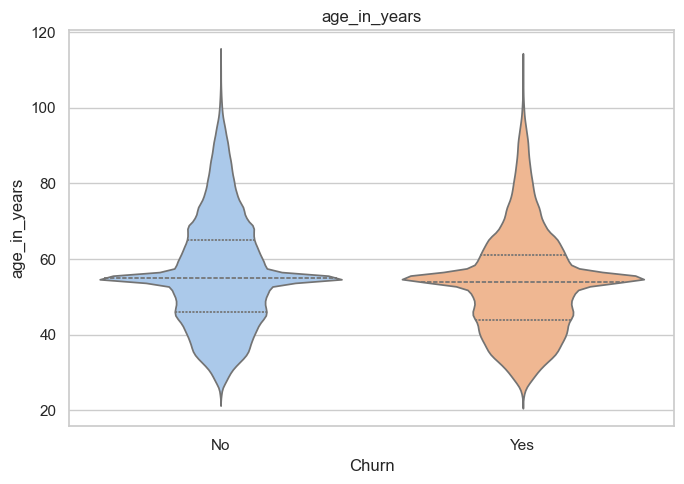

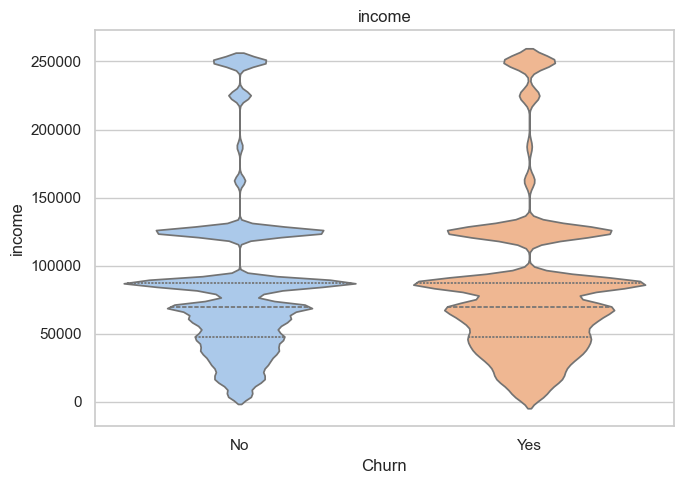

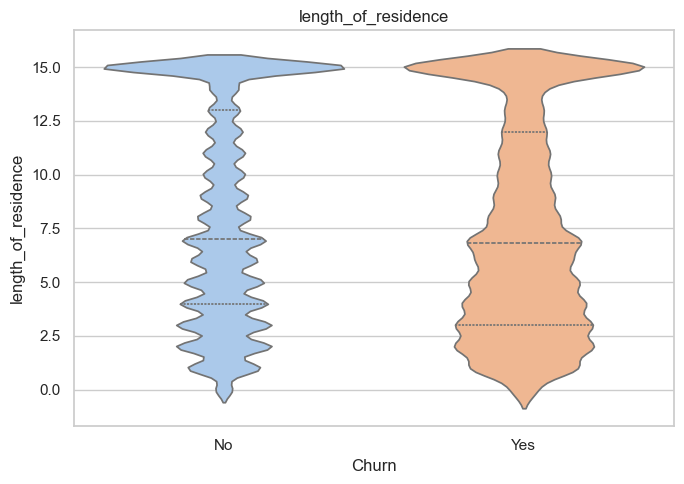

In [43]:
import seaborn as sns

variables = ['days_tenure', 'curr_ann_amt', 'age_in_years', 'income', 'length_of_residence']

sns.set(style="whitegrid")
for var in variables:
    plt.figure(figsize=(7, 5))
    sns.violinplot(
        data=df,
        x='Churn_label',
        y=var,
        hue='Churn_label',
        palette='pastel',
        inner='quartile',
        legend=False
    )
    plt.title(var)
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


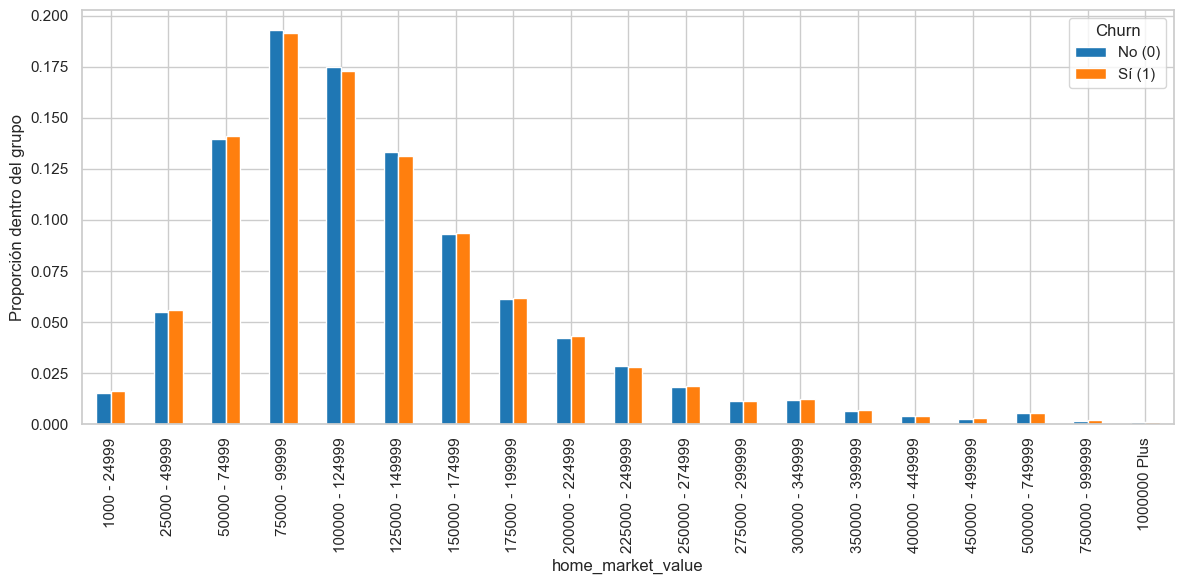

In [44]:
orden_valores = [
    '1000 - 24999', '25000 - 49999', '50000 - 74999', '75000 - 99999',
    '100000 - 124999', '125000 - 149999', '150000 - 174999', '175000 - 199999',
    '200000 - 224999', '225000 - 249999', '250000 - 274999', '275000 - 299999',
    '300000 - 349999', '350000 - 399999', '400000 - 449999', '450000 - 499999',
    '500000 - 749999', '750000 - 999999', '1000000 Plus'
]

# Asegurar orden correcto
df['home_market_value'] = pd.Categorical(df['home_market_value'], categories=orden_valores, ordered=True)

# Calcular proporciones dentro de cada grupo de churn
proportions = (
    df.groupby('Churn')['home_market_value']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)

# Pivotear para graficar
pivot = proportions.pivot(index='home_market_value', columns='Churn', values='proportion')
pivot = pivot.fillna(0)

colors = ['#1f77b4', '#ff7f0e']

# Graficar
pivot.plot(kind='bar', figsize=(12, 6), color=colors)
plt.xlabel('home_market_value')
plt.ylabel('Proporción dentro del grupo')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

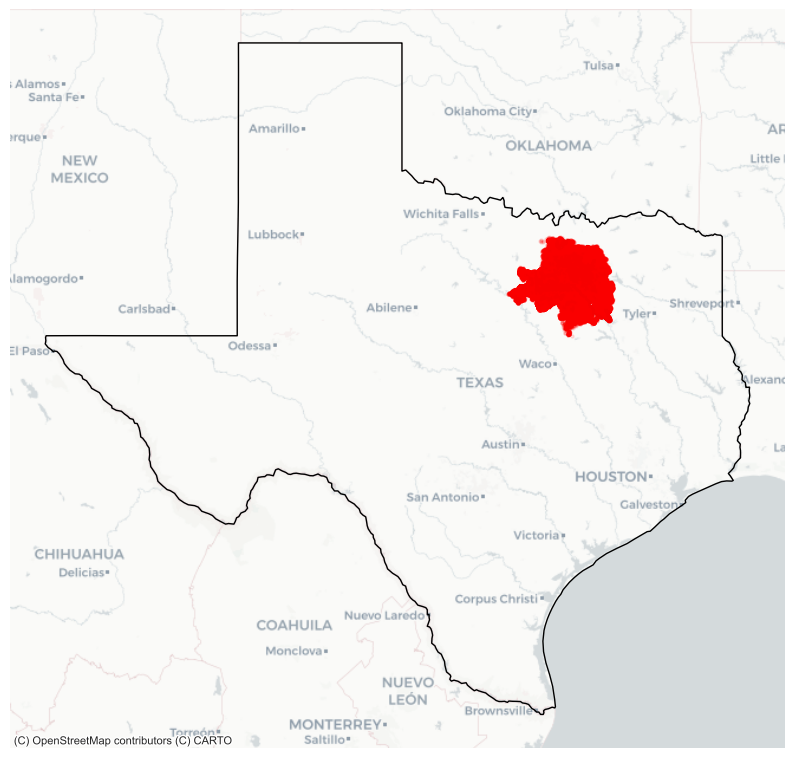

In [45]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Creamos una copia de los datos
df2 = df.copy()

# Eliminamos valores nulos geográficos
df2 = df2.dropna(subset=['longitude', 'latitude'])

# Crear geometría de puntos y definir CRS
geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
geo_df = gpd.GeoDataFrame(df2, geometry=geometry, crs='EPSG:4326')

# Reproyectar a Web Mercator
geo_df = geo_df.to_crs(epsg=3857)

# Descargar y filtrar shapefile de Texas
url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip'
states = gpd.read_file(url)
texas = states[states['NAME'] == 'Texas']
texas = texas.to_crs(epsg=3857)

# Graficar con fondo de mapa
fig, ax = plt.subplots(figsize=(10, 10))
texas.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.1)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.axis('off')
plt.show()

In [46]:
import pandas as pd
from scipy.stats import pointbiserialr, spearmanr, pearsonr
import numpy as np
def calcular_correlacion(x, y, tipo_x, tipo_y):
    # Caso variables continuas
    if tipo_x == 'continuous' and tipo_y == 'continuous':
        return pearsonr(x, y)[0]
    
    # Caso ordinal con cualquier otra (excepto binaria)
    elif (tipo_x == 'ordinal' and tipo_y in ['ordinal', 'continuous']) or \
         (tipo_y == 'ordinal' and tipo_x in ['ordinal', 'continuous']):
        return spearmanr(x, y)[0]
    
    # Caso binaria vs continua
    elif (tipo_x == 'binary' and tipo_y == 'continuous') or \
         (tipo_y == 'binary' and tipo_x == 'continuous'):
        return pointbiserialr(y, x)[0] if tipo_x == 'continuous' else pointbiserialr(x, y)[0]
    
    # Caso binaria vs binaria (coeficiente Phi)
    elif tipo_x == 'binary' and tipo_y == 'binary':
        return pearsonr(x, y)[0]
    
    # Nuevo caso: ordinal vs binaria (usando Spearman)
    elif (tipo_x == 'ordinal' and tipo_y == 'binary') or (tipo_y == 'ordinal' and tipo_x == 'binary'):
        return spearmanr(x, y)[0]
    
    else:
        return np.nan


# Definir tipos de variables según tu descripción
variables = {
    'home_value_ordinal': 'ordinal',
    'income': 'continuous',
    'curr_ann_amt': 'continuous',
    'days_tenure': 'continuous',
    'age_in_years': 'continuous',
    'has_children': 'binary',
    'length_of_residence': 'continuous',
    'home_owner': 'binary',
    'college_degree': 'binary',
    'good_credit': 'binary',
    'Churn': 'binary'
}

# Asumiendo que df es tu DataFrame con los datos
corr_matrix = pd.DataFrame(index=variables.keys(), columns=variables.keys())

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0
        else:
            corr_matrix.loc[var1, var2] = calcular_correlacion(
                df[var1], 
                df[var2], 
                variables[var1], 
                variables[var2]
            )

# Visualizar matriz
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)


,home_value_ordinal,income,curr_ann_amt,days_tenure,age_in_years,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
home_value_ordinal,1.000000,0.439088,0.035946,0.003749,-0.026664,0.023627,-0.151933,-0.047904,0.081351,0.169950,-0.000616
income,0.439088,1.000000,0.132348,0.023177,-0.011300,0.048415,0.049904,0.184063,0.123663,0.267137,-0.005476
curr_ann_amt,0.035946,0.132348,1.000000,0.026876,0.087675,-0.034808,0.176500,0.098619,0.087987,0.053599,0.018434
days_tenure,0.003749,0.023177,0.026876,1.000000,0.294406,-0.050744,0.097783,0.052662,0.038693,0.012677,-0.206253
age_in_years,-0.026664,-0.011300,0.087675,0.294406,1.000000,-0.206353,0.288530,0.113360,0.055612,0.011296,-0.055848
has_children,0.023627,0.048415,-0.034808,-0.050744,-0.206353,1.000000,-0.109420,0.068165,0.043739,0.009635,0.021463
length_of_residence,-0.151933,0.049904,0.176500,0.097783,0.288530,-0.109420,1.000000,0.242792,0.030200,0.038761,-0.034402
home_owner,-0.047904,0.184063,0.098619,0.052662,0.113360,0.068165,0.242792,1.000000,0.101961,0.121590,-0.009390
college_degree,0.081351,0.123663,0.087987,0.038693,0.055612,0.043739,0.030200,0.101961,1.000000,0.038112,-0.017009
good_credit,0.169950,0.267137,0.053599,0.012677,0.011296,0.009635,0.038761,0.121590,0.038112,1.000000,-0.006765


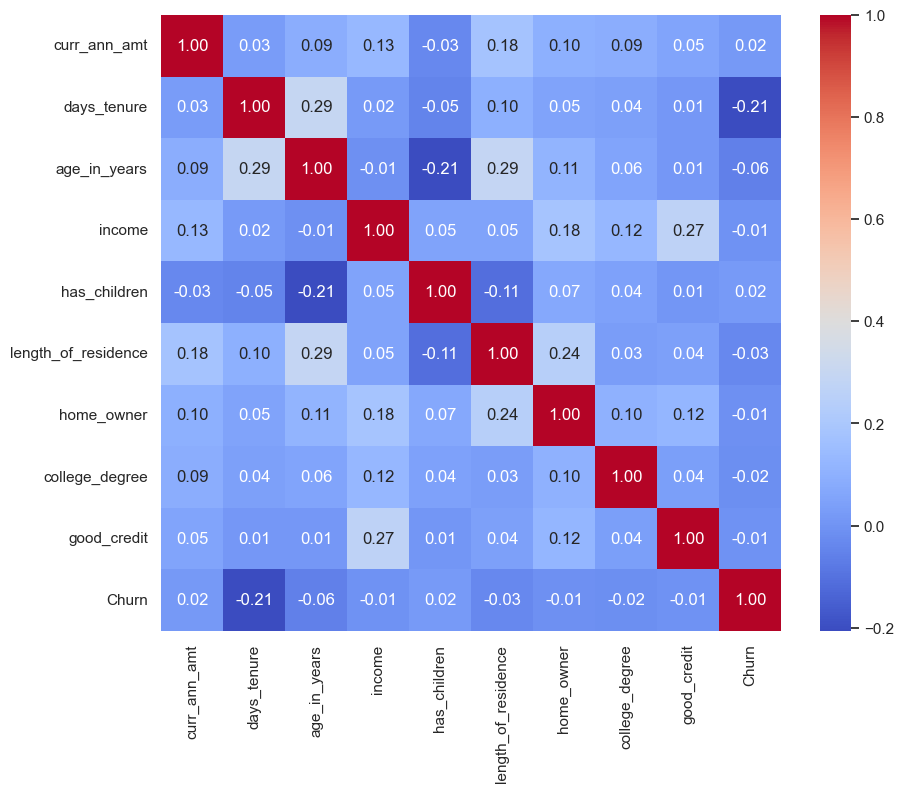

In [47]:
# Selecciona solo las columnas numéricas y binarias
cols_corr = [
    'curr_ann_amt', 'days_tenure', 'age_in_years',
    'income', 'has_children', 'length_of_residence',
    'home_owner', 'college_degree', 'good_credit', 'Churn'
]

# Calcula la matriz de correlación
corr = df[cols_corr].corr()

# Dibuja el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [48]:
# Separar las características y la variable objetivo (y)
features = [
    "days_tenure",
    "curr_ann_amt",
    "age_in_years",
    "income",
    "has_children",
    "length_of_residence",
    "marital_status",
    "home_market_value",
    "home_owner",
    "college_degree",
    "good_credit"
]

X = df[features]  # Solo las variables relevantes
y = df['Churn']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Variables a estandarizar
variables_to_standardize = ['days_tenure', 'curr_ann_amt', 'age_in_years', 'income', 'length_of_residence']

# Primero dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Imprimir la distribución de las clases en los conjuntos de entrenamiento y prueba
print("Distribución en el conjunto de entrenamiento original:")
print(y_train.value_counts())
print("Distribución en el conjunto de prueba original:")
print(y_test.value_counts())

# Crear un escalador
scaler = StandardScaler()

# Establecemos el escalado de las variables seleccionadas primero en el conjunto de entrenamiento
X_train[variables_to_standardize] = scaler.fit_transform(X_train[variables_to_standardize])

# Establecemos el escalado de las variables seleccionadas también en el conjunto de prueba
X_test[variables_to_standardize] = scaler.transform(X_test[variables_to_standardize])

# 1. RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("\nDistribución en el conjunto de entrenamiento (ROS):")
print(y_train_ros.value_counts())

# Aplicamos get_dummies después de la técnica de balanceo
X_train_ros = pd.get_dummies(X_train_ros, columns=['home_market_value'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['home_market_value'], drop_first=True)

# 2. RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nDistribución en el conjunto de entrenamiento (RUS):")
print(y_train_rus.value_counts())

# Aplicamos get_dummies después de la técnica de balanceo
X_train_rus = pd.get_dummies(X_train_rus, columns=['home_market_value'], drop_first=True)

# 3. SMOTE
smote = SMOTENC(categorical_features=[4, 6, 7, 8, 9, 10], random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nDistribución en el conjunto de entrenamiento (SMOTE):")
print(y_train_smote.value_counts())

# Aplicamos get_dummies después de la técnica de balanceo
X_train_smote = pd.get_dummies(X_train_smote, columns=['home_market_value'], drop_first=True)

Distribución en el conjunto de entrenamiento original:
Churn
0    985084
1    126952
Name: count, dtype: int64
Distribución en el conjunto de prueba original:
Churn
0    422179
1     54408
Name: count, dtype: int64

Distribución en el conjunto de entrenamiento (ROS):
Churn
0    985084
1    985084
Name: count, dtype: int64

Distribución en el conjunto de entrenamiento (RUS):
Churn
0    126952
1    126952
Name: count, dtype: int64

Distribución en el conjunto de entrenamiento (SMOTE):
Churn
0    985084
1    985084
Name: count, dtype: int64


Guardamos los datos

In [50]:
df.to_csv('insurance_preprocessed.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_train_ros.to_csv('X_train_ros.csv', index=False)
y_train_ros.to_csv('y_train_ros.csv', index=False)
X_train_rus.to_csv('X_train_rus.csv', index=False)
y_train_rus.to_csv('y_train_rus.csv', index=False)
X_train_smote.to_csv('X_train_smote.csv', index=False)
y_train_smote.to_csv('y_train_smote.csv', index=False)